In [57]:
%load_ext autoreload
%autoreload 2

import math
import cmath
import numpy as np
import scipy
import sympy
from scipy.integrate import solve_ivp

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from pylab import cm
import json

import os
import sys
import re

import matplotlib.patches as patches
from matplotlib import colors as m2colors

import plotly
import plotly.graph_objects as go

from MMfxns import *
from MMplotting import *
from pyDOE2 import lhs

cwd = os.getcwd()
sns.set(style="ticks", font_scale=1.5)

mcolors = dict(m2colors.BASE_COLORS, **m2colors.CSS4_COLORS)

saveall = True

print(plotly.__version__)
print(matplotlib.__version__)
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

pd.set_option('display.expand_frame_repr', False, 'display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
4.13.0
3.3.2


0.008264462809917356
10.0
**
0.0
10.0
**
0.0
10.0
**
0.0
10.0
**
0.0
10.0
**


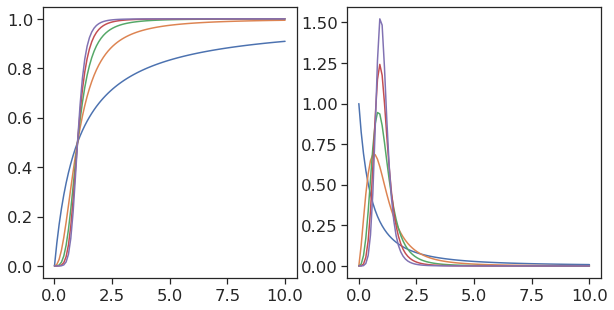

In [16]:
nspace = np.linspace(1,6,5)
xspace = np.linspace(0,10,100)

fig, ax = plt.subplots(1,2,figsize=(10,5))

for ni, nn in enumerate(nspace):

    hill = xspace**nn / (1+xspace**nn)
    ax[0].plot(xspace, hill)

for ni, nn in enumerate(nspace):

    dhill = nn * xspace**(nn-1)/(xspace**nn + 1)**2
    ax[1].plot(xspace, dhill)
    print(np.amin(dhill))
    print(xspace[int(np.argmin(dhill[30:])+30)])
    print('**')
    
plt.show()

0.033895113513570836
1.0995505335529605
3.0


/home/ccprice/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/ccprice/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


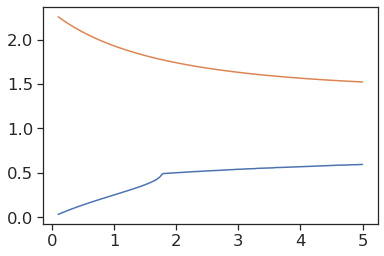

In [3]:
params = {}
mspace = np.linspace(0.1, 5, 100)
params['kc'] = 1.
params['km'] = 'stiff'
params['n'] = 3
params['m0'] = 3.
params['x_c'] = x_crit(params['n'])
# m0 = 1

## x_equil no feedback loop. assumes tau = 1-exp(-m0/m)
x0 = (1-np.exp(-mspace/params['m0']))/(np.exp(-mspace/params['m0']) + np.exp(-params['m0']/mspace))

print(x0[0])
print(x0[-1])

# plt.plot(mspace, x0)

params['n'] = 3
# params['m0'] = 1
params['tau'] = 1.
params['type'] = 'stiff'
aa = 2.5

xeq = np.zeros(len(mspace))
xeq[0] = x0[0]
for mi, mm in enumerate(mspace):    
    if mi > 0:
        xeq[mi] = scipy.optimize.fsolve(x_equil, xeq[mi-1], args=(mm, aa, params), xtol=1e-10)[0]
    else:
        xeq[mi] = scipy.optimize.fsolve(x_equil, xeq[mi], args=(mm, aa, params), xtol=1e-10)[0]

plt.plot(mspace, xeq)
    
topdown = np.flip(mspace)
# print(topdown)
xrev = np.zeros(len(topdown))
xrev[0] = 3 #x0[-1]
print(xrev[0])
for mi, mm in enumerate(topdown):
#     print(mm)
    if mi > 0:
        xrev[mi] = scipy.optimize.fsolve(x_equil, xrev[mi-1], args=(mm, aa, params), xtol=1e-10)[0]
    else:
        xrev[mi] = scipy.optimize.fsolve(x_equil, xrev[mi], args=(mm, aa, params), xtol=1e-10)[0]
    
plt.plot(topdown, xrev)
# plt.ylim([-5,5])

(100,)
(3, 100)


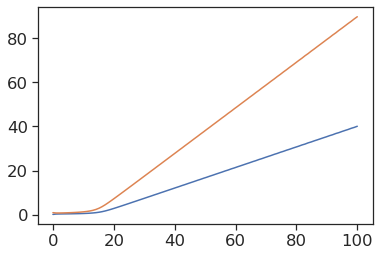

In [4]:
def coupled_eqn(t, y, km, kc, alpha, xt, n):
    
    xn, xc, xt = y
#     km, kc, alpha, n = p
    
    dxndt = km * xc - kc * xn
    dxcdt = kc*xn - km * xc + alpha * xn**n / (xn**n + 1)
    xt = xc + xn
    
    return [dxndt, dxcdt, xt]

m = 0.6
m0 = 1.
kc = 1.
alpha = 1.5
xt = 1.
n = 3.
t_eval = np.linspace(0,100,100)

params = [1-np.exp(-m/m0), kc, alpha, xt, n]
out = solve_ivp(coupled_eqn, [0, 100], [0.1, 0.9, 1.], t_eval = t_eval, args = params)
# print(out)
print(out.t.shape)
print(out.y.shape)

plt.plot(out.t, out.y[0,:])
plt.plot(out.t, out.y[1,:])

1.0728366155142712


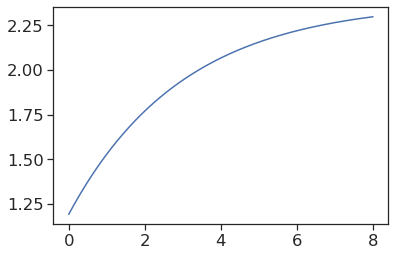

In [5]:
### figure 3 3D landscapes

# stiff genes
res = 200
mspace = np.linspace(0., 8., 200)

params = {}
params['kc'] = 1.
params['km'] = 'stiff'
params['n'] = 3
params['m0'] = 3.
params['x_c'] = x_crit(params['n'])

a_c = alpha_crit(mspace, params)

plt.plot(mspace, a_c)

m_c = scipy.optimize.fsolve(m_crit_general, 0.5, args=(params), xtol=1e-10)[0] / params['m0']

print(m_c)


1.0728366155142712


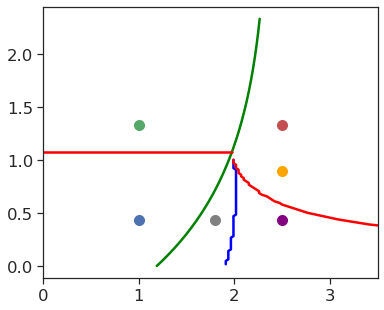

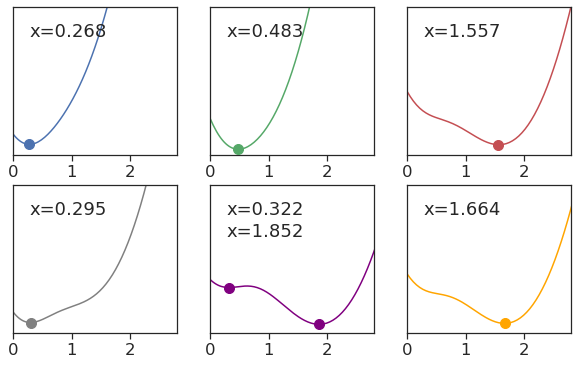

In [65]:
params = {}
params['kc'] = 1.
params['km'] = 'stiff'
params['n'] = 3
params['m0'] = 3.
params['x0'] = 1.; params['a0'] = 0.5; params['xtt'] = 0.;
params['x_c'] = x_crit(params['n'])
res = 150

m_space = np.linspace(0., 7., res)
x_space = np.linspace(0, 4., res)
a_space = np.linspace(0.01, 4., res)
# ac_ind = np.where(np.abs(a_space - a_c) == np.amin(np.abs(a_space-a_c)))[0]

a_c = alpha_crit(m_space, params)
m_c = scipy.optimize.fsolve(m_crit_general, 0.5, args=(params), xtol=1e-10)[0] / params['m0']
print(m_c)

mc_ind = np.where(np.abs(m_space/ params['m0'] - m_c) == np.amin(np.abs(m_space/ params['m0']-m_c)))[0]

# U_data, gmin_overm, b1_overm, b2_overm, inf_overm, capture2minima, capture_mvals = collect_minima(m_space, x_space, a_space, params)
U_data, m0coords, m1coords, m2coords, inf_overm, capture2minima, capture_mvals, capmax = collect_minima(m_space, x_space, a_space, params)

fig, ax = plt.subplots(1,1, figsize=(6, 5))
# print(capture_mvals)
# first order
ax.plot(capture2minima, np.array(capture_mvals) /params['m0'], color='blue', linewidth=2.5)
# first order
ax.plot(capmax, np.array(capture_mvals) /params['m0'], color='red', linewidth=2.5)
# second order
ax.plot(a_c, m_space/params['m0'], color='green', linewidth=2.5)
# second order
ax.plot([np.amin(a_space), a_c[mc_ind]],[m_c, m_c], color='red', linewidth=2.5)
ax.set_xlim([0., 3.5])

fig2, ax2 = plt.subplots(2, 3, figsize=(10, 6))

choose_m = [1.3, 4., 4., 1.3, 1.3, 2.7]
choose_a = [1., 1., 2.5, 1.8, 2.5, 2.5]
colors = ['b','g','r','gray','purple','orange']
for mi, mm in enumerate(choose_m):
    plotcounter = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
    
    aa = choose_a[mi]    
    ax.scatter(aa, mm/params['m0'], s=100, color=colors[mi])
    handle = ax2[plotcounter[mi]]
    
    choose_a_ind = np.where(np.abs(a_space - aa) == np.amin(np.abs(a_space - aa)))[0][0]
    choose_m_ind = np.where(np.abs(m_space - mm) == np.amin(np.abs(m_space - mm)))[0][0]
    
    Uslice = U_data[choose_m_ind, :, :].squeeze()
    m0coordsT = m0coords[choose_m_ind]
    m1coordsT = m1coords[choose_m_ind]
    m2coordsT = m2coords[choose_m_ind]

    handle.plot(x_space, Uslice[:,choose_a_ind], color=colors[mi]) # mcolors['red']
    xargs = scipy.signal.argrelextrema(Uslice[:,choose_a_ind], np.less)[0]      
    x_mins = x_space[xargs]
    handle.scatter(x_mins, Uslice[xargs, choose_a_ind], s=100, color=colors[mi], zorder=10) # color=mcolors['blueviolet']
    handle.set_ylim([np.amin([np.amin(Uslice[:,choose_a_ind])*1.2,-0.1]), .6])
    handle.set_xlim([0., 2.8])
    handle.set_yticks([])
    for xi, xx in enumerate(x_mins):
        handle.text(0.1, 0.8 - 0.15*xi, ('x=%.3f' % xx), transform=handle.transAxes)